# Physics 404/604

## Computational Physics (Spring 2020)

## BPB-250

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |









# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm




## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, … 
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?


**Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.**

## 1.3.1 Recursion method:

Recursion in computer science is a method of solving a problem where the solution depends on solutions to smaller instances of the same problem.

Most computer programming languages support recursion by allowing a function to call itself from within its own code. 

In [1]:
# Recursion method fib2, 
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [2]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 31.0204598903656 seconds ---


## 1.3.2 Memoization method (Top down):

an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

turning [the results of] a function into something to be remembered

In [3]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table) # try this:  please finish this line using recursive method
        
    return table[n]

In [4]:
# calclate time with n=10

import time
n=10
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# try this: Please calculate time if n=40, 1400, 14000
n=40
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# In programming, the call stack is a buffer that stores requests that need to be handled.

55
--- 0.00011706352233886719 seconds ---
102334155
--- 6.031990051269531e-05 seconds ---


## 1.3.2  Tabulation Method (bottom-up)
Calculate all the values from small to big

In [5]:
# calculate numbers one by one from table[2] to table[n]

def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
       
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    for i in range(2,n+1):
        table[i] = table[i-1] + table[i-2]
        
    return table[n]

In [6]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(1400))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.00022220611572265625 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0002880096435546875 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285

## 1.3.3 Using Matrix Algebra (Optional)

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

To calculate F(100), need $A^{100}$ -> $(A^{50})^2$->$A^{25}$->$A^{12}$->$A^6$->$A^3$->$A^1$

In [7]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [8]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.00019025802612304688 seconds ---
300246876117846109099549417971502564869274793749079294346837542950223024294228483586340233357521621786581163873038935223918134230775672041461939121779854257599654108106050190530215701900261496471731080880947867560271144036124150073269914583437785632639403707166627432165730532080405530702101979325176283081670158738699488803236223219821984354986527588069961235927512524345713249677285488650870339664336504245433300980200638428685958164929639080300323265489846456158923444513986324260628571159174622288080739105721191265581849979872098730254071206795984080210684977654752224742990461835739477172565325355934619528260128501916936020735517922381485710640528500799754769254637875706299958165786718842099577065056552137787433308596312344425895305275146120697761507951143586287967843908117553626557697710686507409951289723510053824119644581556829137784665635297922809891156667595652564418264560817860383717222783889672542560571994230003765052623148688106603

# 2. the complexity of the algorithms

Algorithm complexity is a measure which evaluates the order of the count of operations, performed by a given or algorithm as a function of the size of the input data. To put this simpler, complexity is a rough approximation of the number of steps necessary to execute an algorithm. When we evaluate complexity we speak of order of operation count, not of their exact count. 

For example if we have an order of $N^2$ operations to process N elements, then $N^2$/2 and 3*$N^2$ are of one and the same quadratic order.

Algorithm complexity is commonly represented with the O(f) notation e.g. O($N^2$). We can measure the algorithm complexity by plotting n vs. steps, or n vs. execution time.

In [9]:
import numpy as np
n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


1 7.152557373046875e-06
4 8.821487426757812e-06
7 1.811981201171875e-05
10 7.605552673339844e-05
13 0.0003097057342529297
16 0.0012919902801513672
19 0.005627870559692383
22 0.023759126663208008
25 0.10049104690551758
28 0.41643524169921875
31 1.7530381679534912
34 7.407727241516113
37 31.435065031051636
40 134.3109519481659


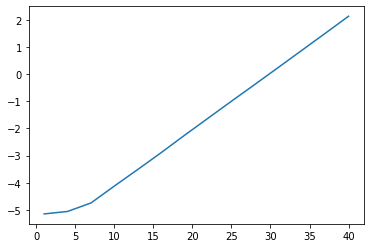

In [10]:
import matplotlib.pyplot as plt
import math

# please make a plot of n2 vs np.log10(time2) and think about how this plot shows that the complexity of fib2 is O(2^N)
plt.plot(n2, np.log10(time2))


In [11]:
# try this: following the above example to calculate the time when n=n2[0], n2[1]...., and make a plot for log10(time) vs n
# for fib4

n2=np.arange(100,100000,100)
time2=np.zeros(n2.size)

for i in range(n2.size):
    
    print(n2[i],time2[i])


100 0.0
200 0.0
300 0.0
400 0.0
500 0.0
600 0.0
700 0.0
800 0.0
900 0.0
1000 0.0
1100 0.0
1200 0.0
1300 0.0
1400 0.0
1500 0.0
1600 0.0
1700 0.0
1800 0.0
1900 0.0
2000 0.0
2100 0.0
2200 0.0
2300 0.0
2400 0.0
2500 0.0
2600 0.0
2700 0.0
2800 0.0
2900 0.0
3000 0.0
3100 0.0
3200 0.0
3300 0.0
3400 0.0
3500 0.0
3600 0.0
3700 0.0
3800 0.0
3900 0.0
4000 0.0
4100 0.0
4200 0.0
4300 0.0
4400 0.0
4500 0.0
4600 0.0
4700 0.0
4800 0.0
4900 0.0
5000 0.0
5100 0.0
5200 0.0
5300 0.0
5400 0.0
5500 0.0
5600 0.0
5700 0.0
5800 0.0
5900 0.0
6000 0.0
6100 0.0
6200 0.0
6300 0.0
6400 0.0
6500 0.0
6600 0.0
6700 0.0
6800 0.0
6900 0.0
7000 0.0
7100 0.0
7200 0.0
7300 0.0
7400 0.0
7500 0.0
7600 0.0
7700 0.0
7800 0.0
7900 0.0
8000 0.0
8100 0.0
8200 0.0
8300 0.0
8400 0.0
8500 0.0
8600 0.0
8700 0.0
8800 0.0
8900 0.0
9000 0.0
9100 0.0
9200 0.0
9300 0.0
9400 0.0
9500 0.0
9600 0.0
9700 0.0
9800 0.0
9900 0.0
10000 0.0
10100 0.0
10200 0.0
10300 0.0
10400 0.0
10500 0.0
10600 0.0
10700 0.0
10800 0.0
10900 0.0
11000 0.0
11100 0.

/var/folders/_c/lhcqr7nj5c1cwg6wzg9190yw0000gn/T/ipykernel_42635/805824750.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(n2),np.log10(time2))


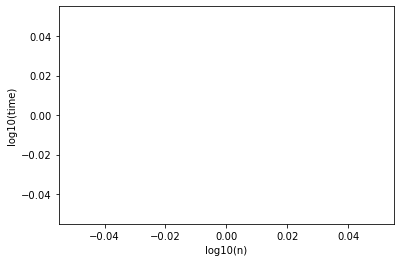

In [12]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

# Homework

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method. 

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.
